<a href="https://colab.research.google.com/github/TirendazAcademy/NLP-with-Transformers/blob/main/Twitter%20Sentiment%20Analysis%20with%203000%20tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Perform a Twitter Sentiment Analysis with Snscrape and Hugging Face

What do football lovers think about the FIFA World Cup 2022? To find out that, I'll perform a Twitter sentiment analysis using the hashtag #WorldCup2022 on Twitter. Here are what I'll cover in this blog:

- What is Sentiment Analysis?
- What is Social Media Scraping?
- How to scrape with Snscrape?
- How to perform Twitter sentiment analysis?

Let's get started!

# How to scrape with snscrape?

First, let's take a look at how to scrape the tweets with Snscrape.

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 2.7 MB/s 


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating a list to append all tweet attributes(data)
tweets = []

# Creating query
query = '#WorldCup2022 lang:en since:2022-11-20 until:2022-11-21'
q = sntwitter.TwitterSearchScraper(query)

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(q.get_items()):
    if i>1000:
        break
    tweets.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

# Converting data to dataframe
tweets_df = pd.DataFrame(tweets, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])
tweets_df.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,ClueNames,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...
1,OmarYKhan,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,abdellatif_adel,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...
3,RookieArmy8,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...
4,Rahmat110313,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h..."


# Twitter Sentiment Analysis with Hugging Face

Let's import the model we'll use for Twitter sentiment analysis.

In [3]:
!pip install transformers
from transformers import pipeline
sentiment_analysis = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 26.6 MB/s 
     |████████████████████████████████| 182 kB 62.1 MB/s 
     |████████████████████████████████| 7.6 MB 86.0 MB/s 


Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

After that let's find out the sentiment in each tweet with the for loop.

In [4]:
# Creating a list to append all tweet attributes(data)
tweet_sa = []

# Creating query
query = '#WorldCup2022 lang:en since:2022-11-20 until:2022-11-21'
q = sntwitter.TwitterSearchScraper(query)

# Predicting the sentiments of tweets
for i,tweet in enumerate(q.get_items()):
    if i>30000:
        break
    content = tweet.content
    sentiment = sentiment_analysis(content)
    tweet_sa.append({'tweet': content, 'sentiment': sentiment[0]['label'], 'date':tweet.date})

Let's convert data into a dataframe.

In [5]:
import pandas as pd
pd.set_option('max_colwidth', None)

# Converting data to dataframe
df = pd.DataFrame(tweet_sa)
df.head()

,tweet,sentiment,date
0,What are we drinking today @TucanTribe \n@MadBears_ \n@lkinc_algo \n@al_goanna \n\n#WorldCup2022 https://t.co/Oga3TzvG5h,neutral,2022-11-20 23:59:21+00:00
1,Amazing @CanadaSoccerEN #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986. Can’t wait to see these boys in action!\n\nThis is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8,positive,2022-11-20 23:59:01+00:00
2,Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU,positive,2022-11-20 23:58:41+00:00
3,Golden Maknae shinning bright\n\nhttps://t.co/4AyZbzGTX4\n#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK \n@BTS_twt,positive,2022-11-20 23:58:33+00:00
4,"If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony?? https://t.co/f72P03ZN2k",negative,2022-11-20 23:58:28+00:00


In [6]:
df.tail()

,tweet,sentiment,date
22496,Here We go World cup 2022 #WorldCup2022,positive,2022-11-20 00:00:21+00:00
22497,Anderlecht confirms former Viborg FF's Jesper Fredberg as sporting director - Get Belgian &amp; Dutch Football News\nhttps://t.co/0k4QgFp3bQ #DeNet #Footballplayer #worldcup2022 #Brasil 🐶😘😊🤓🤗😛,neutral,2022-11-20 00:00:03+00:00
22498,Great thread to read before the start of #WorldCup2022 https://t.co/VP62JDn1da,positive,2022-11-20 00:00:01+00:00
22499,Raphinha wants Brazil to be united at the #WorldCup2022 👊🇧🇷 https://t.co/BXncqvAFup,positive,2022-11-20 00:00:00+00:00
22500,How to buy $SOT on PinkSale?🤔\n\nHave you been confused about how to buy tokens on PinkSale by the most simple steps?\n\n👉Follow the below-detailed video to purchase $SOT on PinkSale. \n\n💰 Buy here - limited quantities: https://t.co/3aLmaiFibc\n\n#SoccerCrypto #football #worldcup2022 https://t.co/mVVYvrDQMZ,neutral,2022-11-20 00:00:00+00:00


# Data Visualization

First, let's count the number of tweets by sentiments.

In [7]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

sentiment
negative    5847
neutral     8069
positive    8585
dtype: int64


Now let's draw a pie plot for the sentiments.

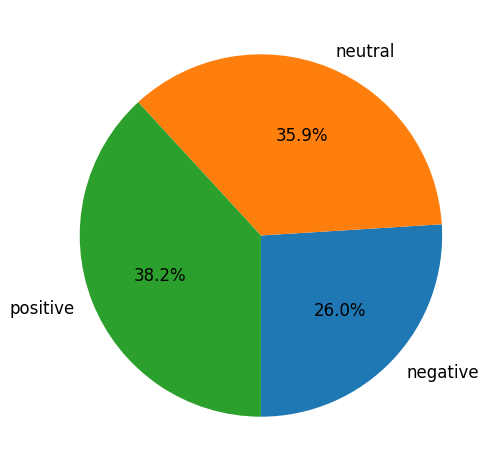

In [8]:
# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot()
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

Let's create a world cloud with positive tweets.

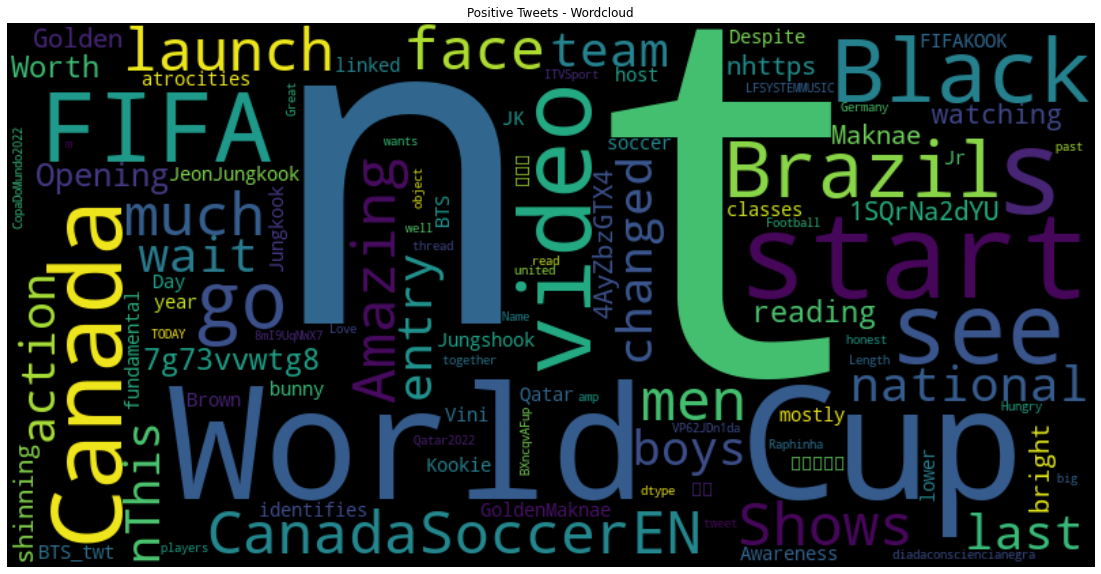

In [9]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'positive']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
positive_wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords = stop_words).generate(str(positive_tweets))
plt.figure(figsize=[20,10])
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Next, let's create a world cloud with positive tweets.

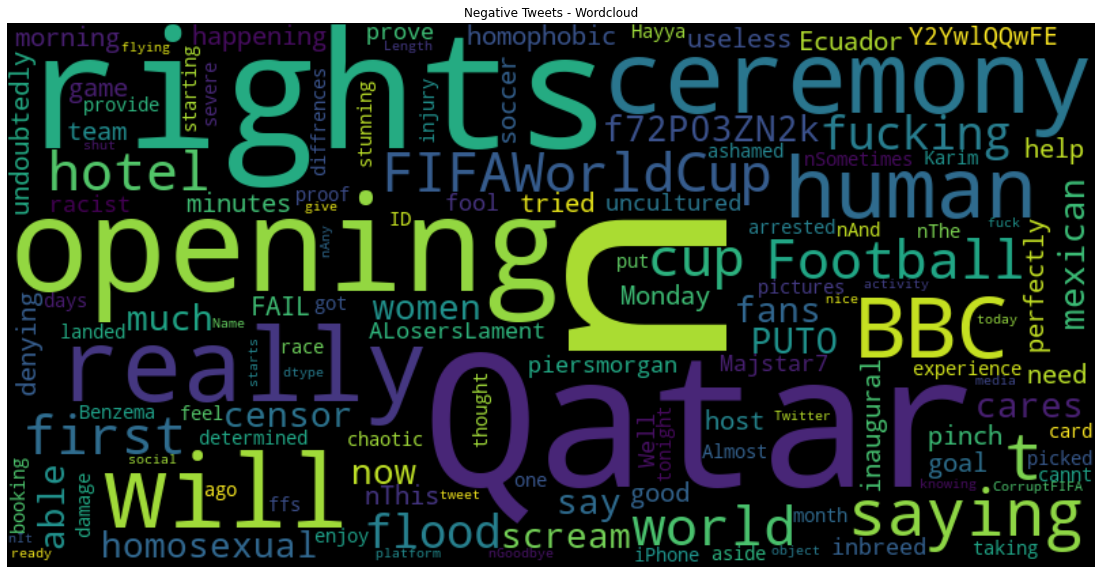

In [10]:
# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'negative']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
negative_wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords = stop_words).generate(str(negative_tweets))
plt.figure(figsize=[20,10])
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

That's it. Thanks for reading. I hope you enjoy it. You can find the notebook I used on this blog here. Don't forget to follow us on [YouTube](https://youtube.com/tirendazacademy) | [Twitter](https://twitter.com/TirendazAcademy) | [Instagram](https://www.instagram.com/tirendazacademy/) | [TikTok](https://www.tiktok.com/@tirendazacademy) 👍